# Welcome to Week 5 of your PODA computer labs

This week, we will look into variable relationships. Specifically, we will start with correlation analysis and then focus on linear regression.

The dataset we're going to use this week comes from the scikit learn package. This allows us to make use of the dataset documentation as well as the pre-defined independent and dependent variables within it.

Specifically, we will work with the Diabetes dataset. You can have a look at the documentation for that data [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

In [8]:
import sklearn.datasets as ds

df = ds.load_diabetes()

print(df.DESCR) #This gives us a quick summary of the dataset. The DESCR function is a special function for these scikit learn datasets.

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
# For some of our later analysis it's more convenient to transform the data into a pandas dataframe

import pandas as pd

df = pd.DataFrame(df['data'], #specifies that we just want to look at the data columns (our independent variables)
            columns = df.feature_names) # keeps column names intact 

print (df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

You will notice that each of our values has already been mean centered and scaled for us, so we can proceed without the need of additional pre-processing to our correlation analysis and regression.

# Section 1: Correlation analysis

### 1.1 Visualisation and plotting

**TASK**

In a first step, we now to visualise how our variables relate to each other. A very nice way to do that is using the seaborn function pairplot().

To limit our output, I would recommend focusing on just a couple of variables. But feel free to plot different combinations and check out how this function can be used.

In this example, I want to plot the six different blood test results (s1, s2, ..., s6). So, I first create a sub dataframe.

In [10]:
df_sub = df[["s1", "s2", "s3", "s4", "s5", "s6"]]

Using the df_sub above and the pairplot() function in seaborn, plot the correlations between these six variables. Look at the plots and check whether there are any correlations that you can see immediately from the plots.

Warning: This function can be computationally a little expensive, so please be patient while your plot is being created.


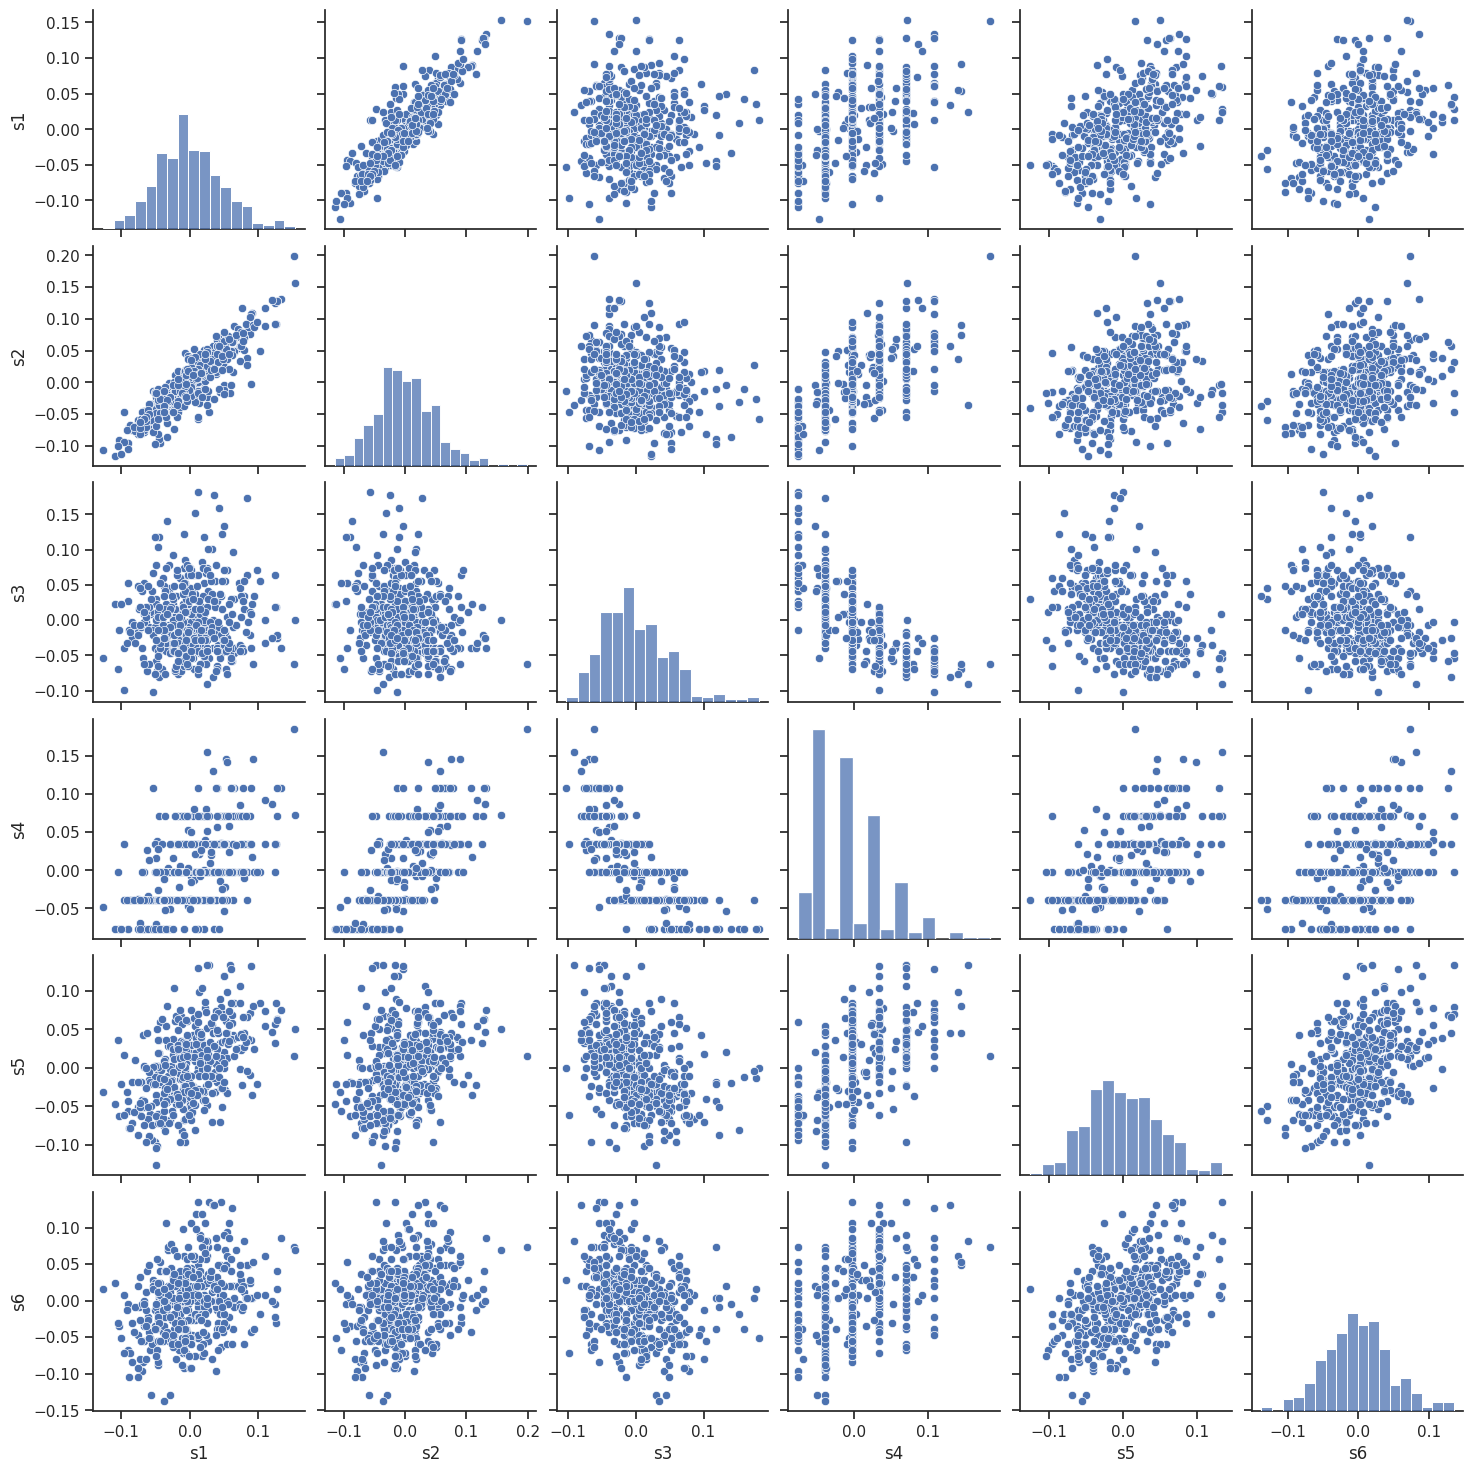

In [11]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with color differentiation based on the "species" variable
sns.set(style="ticks")
sns.pairplot(data=df_sub)

# Show the plot
plt.show()

### 1.2 Correlation coefficients

After the first visualisation, we are interested in the actual correlation coefficients.

The easiest way to create a correlation matrix is using the corr() function from pandas. Start by reading the documentation for that function [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

You will notice that one of the parameters for that function is the different correlation metrics that can be used. You can choose between

- pearson : Pearson correlation coeffcient (for continuous data which are normally distributed, homoscedastic and have a linear relationship)
- kendall : Kendall Tau correlation coefficient (for at least ordinal data; doesn't require normal distribution)
- spearman : Spearman rank correlation (for at least ordinal data; doesn't require normal distribution)

**TASK**

Using the pandas corr() function, print a correlation matrix of the variables in your dataframe. For illustration purposes, you can choose any correlation coefficient for this or try different ones and compare the results. You can also try this for the whole dataframe (df) or continue working with the subset from earlier (df_sub).

In [12]:
# Your code here
correlation_matrix = df_sub.corr()

print(correlation_matrix)

          s1        s2        s3        s4        s5        s6
s1  1.000000  0.896663  0.051519  0.542207  0.515503  0.325717
s2  0.896663  1.000000 -0.196455  0.659817  0.318357  0.290600
s3  0.051519 -0.196455  1.000000 -0.738493 -0.398577 -0.273697
s4  0.542207  0.659817 -0.738493  1.000000  0.617859  0.417212
s5  0.515503  0.318357 -0.398577  0.617859  1.000000  0.464669
s6  0.325717  0.290600 -0.273697  0.417212  0.464669  1.000000


In [13]:
correlation_matrix = df_sub.corr(method='pearson', min_periods=1, numeric_only=False)

print(correlation_matrix)

          s1        s2        s3        s4        s5        s6
s1  1.000000  0.896663  0.051519  0.542207  0.515503  0.325717
s2  0.896663  1.000000 -0.196455  0.659817  0.318357  0.290600
s3  0.051519 -0.196455  1.000000 -0.738493 -0.398577 -0.273697
s4  0.542207  0.659817 -0.738493  1.000000  0.617859  0.417212
s5  0.515503  0.318357 -0.398577  0.617859  1.000000  0.464669
s6  0.325717  0.290600 -0.273697  0.417212  0.464669  1.000000


**TASK**

Now that we have created our correlation matrix, we can alsoa have a look at another way of visualising the result. 

Again, seaborn provides us with beautiful and very convenient plotting functions.

Have a look at the seaborn function [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html). Try creating one and use the correlation matrix you created in the previous task as the input.

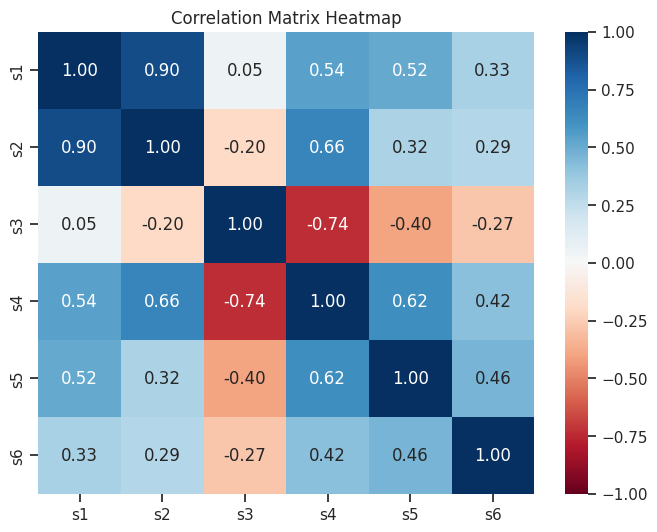

In [14]:
# Your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax =1,fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Section 2: Linear regression

We now want to implement a linear regression model using our diabetes dataset.

First, we have to define what is the independent and what is the dependent part of our data. With the Diabetes data from sklearn, these are already defined for us. As a reminder, the documentation for the data can be found [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). You can see that there are two parts to the data: 'data' and 'target'.

- 'target' will be our y - it's described as "a quantitative measure of disease progression one year after baseline"
- 'data' will be our X. We've already looked at the different features above and will now use them to try and predict y.

Our first step is now to separate those into two separate pandas dataframes. That makes it easier to use the inbuilt linear regression functions

In [15]:
dataset_class = ds.load_diabetes()
X = pd.DataFrame(data = dataset_class['data'], columns = dataset_class['feature_names'])
y = pd.DataFrame(data = dataset_class['target'], columns = ['target'])

print(X)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

### 2.1 Simple linear regression

**TASK**

We will start with a simple linear regression model with just one explanatory variable X.

You can choose any of the variables which interest you. I will pick 'bp' which is the average blood pressure.

I would recommend using the statsmodels function for model building. You should first have a look at the documentation [here](https://www.statsmodels.org/stable/regression.html).

Using that function and the OLS estimator, create a simple linear regression model and print the summary of it using the summary() function.

You can closely follow the example in the documentation above.

Tip: You will notice and see in the documentation that you will have to add a constant to your X for this model to work. I do that using sm.add_constant(X).

In [16]:
import statsmodels.api as sm

In [5]:
%pip install statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 43.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 11.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import statsmodels.api as sm

X_bp = X[['bp']]

model_simple = sm.OLS(y,sm.add_constant(X_bp))

result_simple = model_simple.fit()

print(result_simple.summary())





                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     106.5
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.65e-22
Time:                        15:44:01   Log-Likelihood:                -2499.3
No. Observations:                 442   AIC:                             5003.
Df Residuals:                     440   BIC:                             5011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      3.294     46.185      0.0

### 2.2 Multiple linear regression

**TASK**

Now let's have a look what changes when we add all our variables to the model. Using the same statsmodel OLS() function from above, this time include all of the variables in X. Print the model summary and compare your results to those above. What do you notice? Does your model's explanatory power improve?

In [18]:
# Your code here
X_subset = X.drop(['age', 's2','s4'], axis = 1)
X_subset = X [['sex','bmi','bp','s1','s3','s5','s6']]

model_multi2 = sm.OLS(y, sm.add_constant(X_subset))
result_multi2 = model_multi2.fit()
print(result_multi2.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     65.73
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           3.15e-64
Time:                        15:47:24   Log-Likelihood:                -2387.4
No. Observations:                 442   AIC:                             4791.
Df Residuals:                     434   BIC:                             4824.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.575     59.073      0.0

### Optional extra tasks:

Have a closer look at the regression output, in particular the significance of your coefficients. What do you notice? Think back to your correlation analysis from earlier. You can consider removing some of those stronger correlated variables and re-run the linear regression with a smaller number of X variables. What changes regarding your model fit?